<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/Week_8_Modifying_interpolation_focusing_on_higher_energy_pions_producing_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log
import pandas as pd

In [2]:
## Reading in data from 2014 study; "Measurement of charged pion production yields offf the NuMI target"

Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()

Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )

Pion_Plots_df1 = Pion_Plots_df1.drop(0)

Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']

In [3]:
## Converting the first column of the dataframe from string to float values.

## Calculating the bin width of each row

interval_mid_list = []
bin_width_list = []

for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )

  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

#display(interval_mid_list)
bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)
display(np.shape(interval_mid_array))
display(np.shape(Pion_Plots_df1['pz (GeV=c)']))

## Adding a column to the dataframe that displays the bin width of each row.

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()

Pion_Plots_df1['bin width'] = bin_width_array.tolist()

#display(Pion_Plots_df1.head(5))

# Organising new columns that have just been created
column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value")

Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move)

column_to_move = Pion_Plots_df1.pop("bin width")

Pion_Plots_df1.insert(2, "bin width", column_to_move)

(124,)

(124,)

In [4]:
# Allocating colours to rows of the dataframe based upon pion transverse momentum

# Creating a new column in the dataframe to store these allocated colour codes

pT_colour_code_list = []

for i in range(len(Pion_Plots_df1['pT (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
  elif Z[0] == 0.10:
    colour_code = 1
  elif Z[0] == 0.20:
    colour_code = 2
  elif Z[0] == 0.30:
    colour_code = 3
  elif Z[0] == 0.40:
    colour_code = 4
  else:
    colour_code = 5

  pT_colour_code_list.append(colour_code)

pT_colour_code_array = np.array(pT_colour_code_list)
display(np.shape(pT_colour_code_array))
display(np.shape(Pion_Plots_df1['pT (GeV=c)']))

# Organising the positions of the new columns in the dataframe
Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)
display(Pion_Plots_df1.head(5))

# Converting columns into floats - in order to amke plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)

column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)
display(Pion_Plots_df1.head(-5))

# We divide the count by the bin width.  When we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

# creating a new column in the dataframe that will be filled with the final values to be plotted in the complete and correct plot

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

display(Pion_Plots_df1)

(124,)

(124,)

,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59


,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092000,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,"[56.00,68.00)",62.00,6.00,0,"[0.00,0.10)",0.000190,1.90E-04,11.86,4.92,NaN,NaN,NaN,NaN,NaN,NaN
116,"[56.00,68.00)",62.00,6.00,1,"[0.10,0.20)",0.000424,4.24E-04,9.19,4.65,8.79E-05,16.67,5.70,0.19,19.03,4.58
117,"[56.00,68.00)",62.00,6.00,2,"[0.20,0.30)",0.000580,5.80E-04,6.28,5.96,1.71E-04,11.59,4.69,0.36,13.18,4.58
118,"[56.00,68.00)",62.00,6.00,3,"[0.30,0.40)",0.000627,6.27E-04,5.64,4.68,1.52E-04,11.85,5.76,0.3,13.12,4.58


,pz (GeV=c),pz (GeV=c) - mid range value,bin width,pT (GeV=c) - plot colour codes,pT (GeV=c),N_{\pi^+}/POT --- float,N_{\pi^+}/POT / bin width,$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%),Final pi^+ plot value
1,"[0.30,0.50)",0.40,0.10,0,"[0.00,0.10)",0.332000,3.320000,3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19,3.320000
2,"[0.30,0.50)",0.40,0.10,1,"[0.10,0.20)",0.325000,3.250000,3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64,3.250000
3,"[0.30,0.50)",0.40,0.10,2,"[0.20,0.30)",0.193000,1.930000,1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59,1.930000
4,"[0.30,0.50)",0.40,0.10,3,"[0.30,0.40)",0.106000,1.060000,1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61,1.060000
5,"[0.50,0.62)",0.56,0.06,0,"[0.00,0.10)",0.092000,1.533333,9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"[56.00,68.00)",62.00,6.00,5,"[0.50,2.00)",0.002810,0.000468,2.81E-03,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58,0.000468
121,"[68.00,80.00)",74.00,6.00,2,"[0.20,0.30)",0.000236,0.000039,2.36E-04,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN,0.000039
122,"[68.00,80.00)",74.00,6.00,3,"[0.30,0.40)",0.000188,0.000031,1.88E-04,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN,0.000031
123,"[68.00,80.00)",74.00,6.00,4,"[0.40,0.50)",0.000188,0.000031,1.88E-04,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN,0.000031


In [5]:
#################### WHAT IS IN THE ABOVE CELL, CAN BE DONE USING "df.loc" ## Below is the code ####################


Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300
# display(Pion_Plots_df1)

In [8]:
# Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)

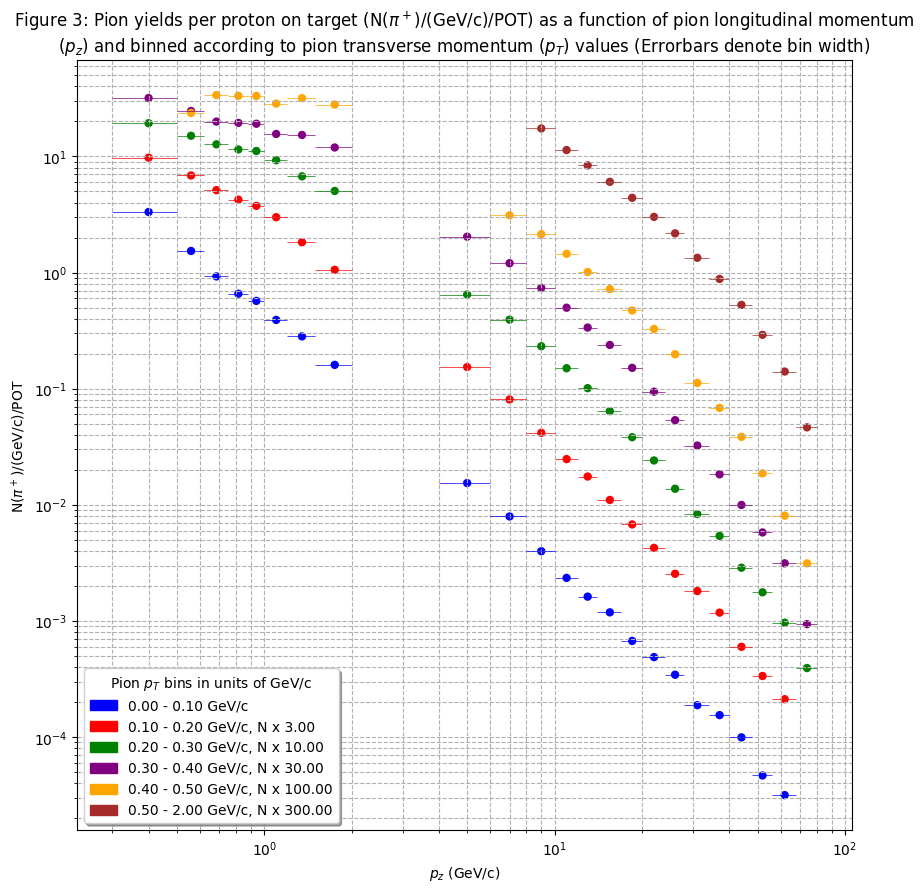

In [9]:
## CORRECT PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = Pion_Plots_df1["pz (GeV=c) - mid range value"]   ,   y = Pion_Plots_df1["Final pi^+ plot value"]    ,   c = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours) , s = 25 , label =  labels_list )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
            ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#              ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

Begin new interpolation work below

Produce interpolations based upon the blue, red, green and purple data points. REMEMBER TO ONLY USE PIONS OF 5GEV AND UP.

Then produce the histograms using the function that Abbey helped edit.

